In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

import xgboost as xgb
# from sklearn.externals import joblib
import joblib
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [15]:

df = pd.read_csv('submission9.csv')

for index, row in df.iterrows():
    if (index>4 and index<len(df)-4):
        if(df['y'][index-1] == 0 and df['y'][index-2] == 0 and df['y'][index+1] == 0
            and df['y'][index+2] == 0 and df['y'][index] == 1):
            print(index)



1133
1263
4985
8320
8501
9970
12118


In [4]:
data = pd.read_csv('data/train.csv')
data.head()

,id,time,x,y
0,1,0,800,0
1,1,780,780,0
2,1,1572,792,0
3,1,2392,820,0
4,1,3196,804,0


In [5]:
data.groupby(by=['id']).max().sort_values(by=['y'])

,time,x,y
id,,,
1,1397264,1844,1
172,71184,844,1
173,182548,852,1
174,259332,1516,1
177,71152,2612,1
...,...,...,...
92,52744,1068,1
93,42228,604,1
96,56036,624,1


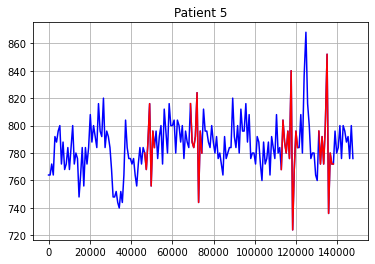

In [8]:


id_i = 5 


a = data[data['id']==id_i]

b = a[a['y']==1]

c = b.iloc[:-1][np.diff(b['time'])>1000]

c = b.iloc[0:1].append(c)

c = c.append(b.iloc[-1])

plt.figure()
plt.plot(a['time'], a['x'], 'b')
plt.grid()

j = 5

for j in range(len(c)-1):
    d = b[(b['time']>c.iloc[j]['time']) & (b['time']<c.iloc[j+1]['time'])]
    plt.plot(d['time'], d['x'], 'r')
plt.title('Patient '+str(id_i))

plt.savefig('5.png')
# for id_i in pd.unique(data['id']):
#     a = data[data['id']==id_i]

#     b = a[a['y']==1]

#     c = b.iloc[:-1][np.diff(b['time'])>1000]

#     c = b.iloc[0:1].append(c)

#     c = c.append(b.iloc[-1])

#     plt.figure()
#     plt.plot(a['time'], a['x'], 'b')
#     plt.grid()

#     j = 5

#     for j in range(len(c)-1):
#         d = b[(b['time']>c.iloc[j]['time']) & (b['time']<c.iloc[j+1]['time'])]
#         plt.plot(d['time'], d['x'], 'r')
#     plt.title(str(id_i))

c:\users\mdyakova\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()


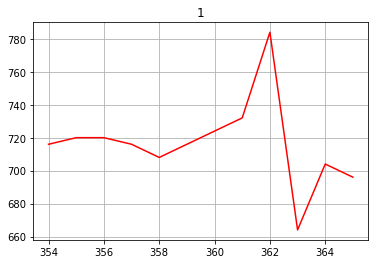

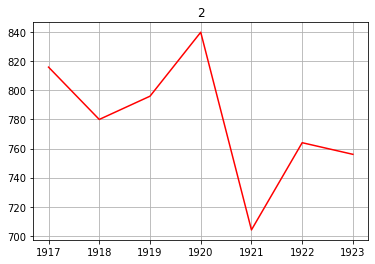

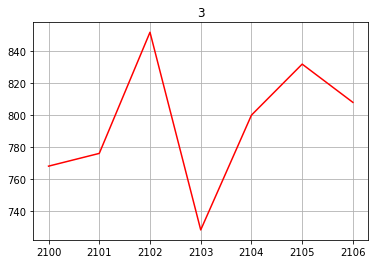

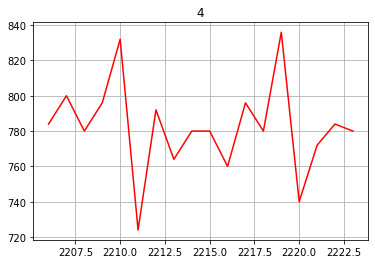

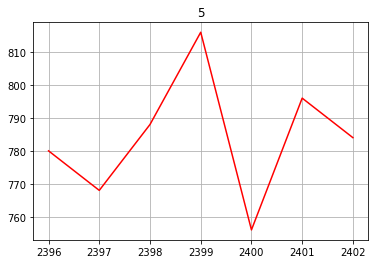

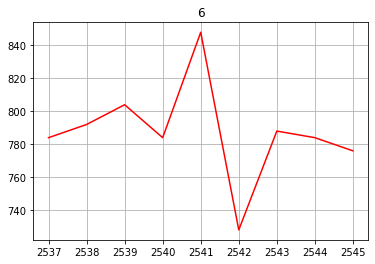

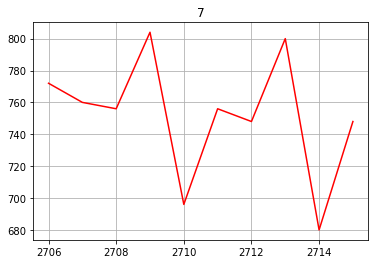

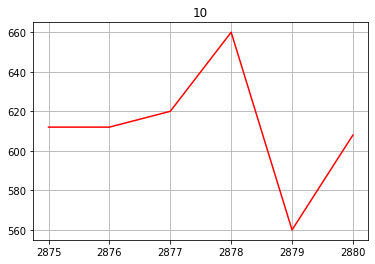

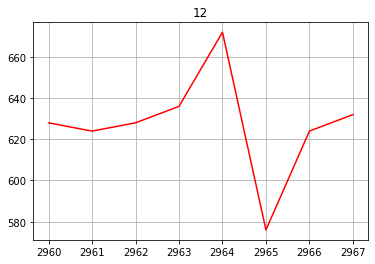

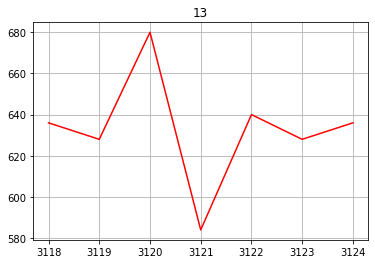

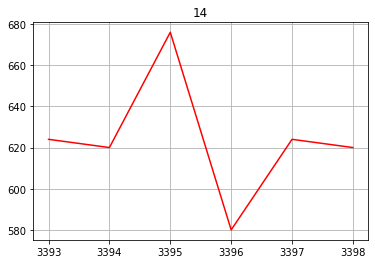

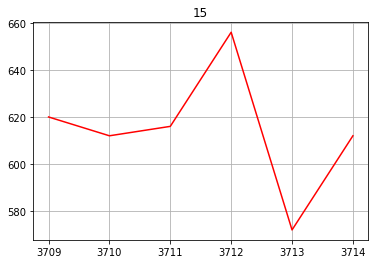

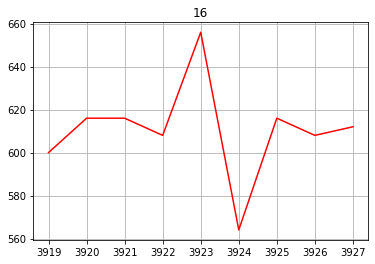

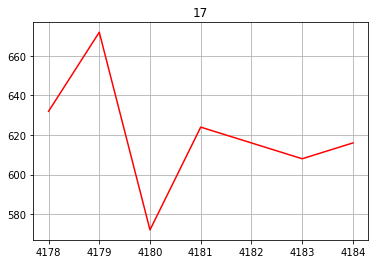

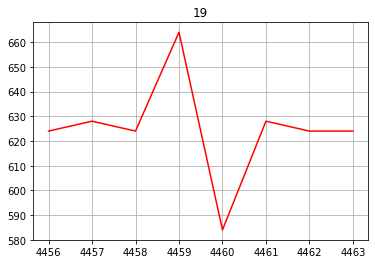

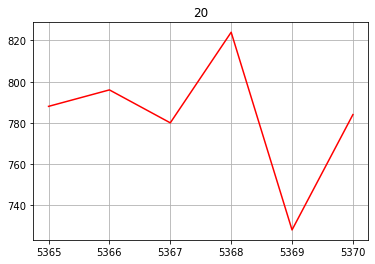

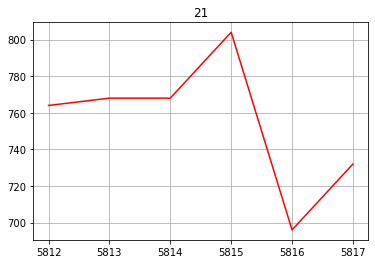

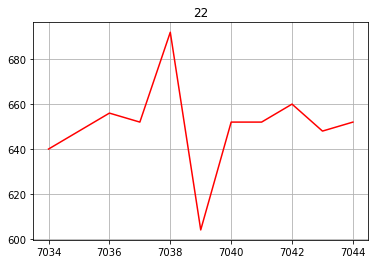

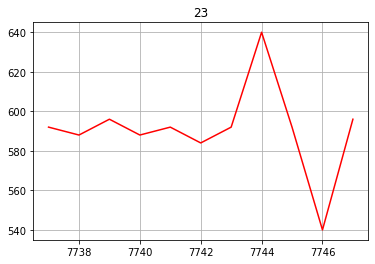

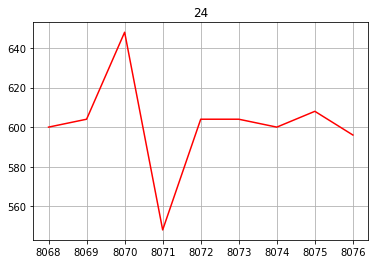

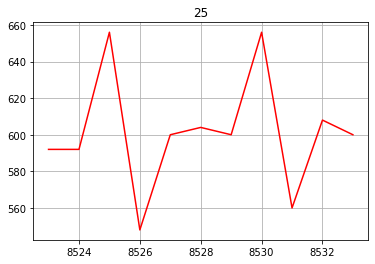

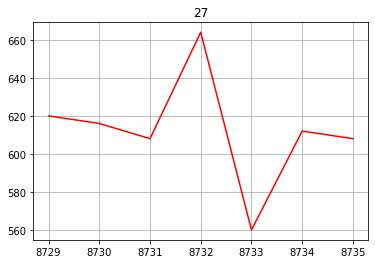

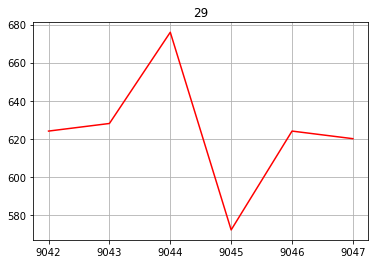

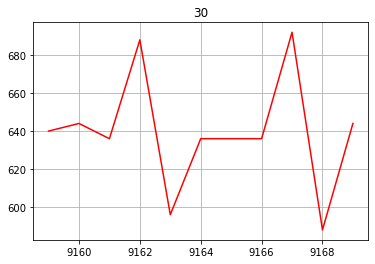

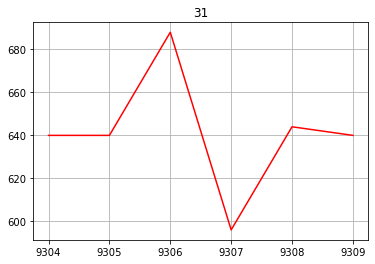

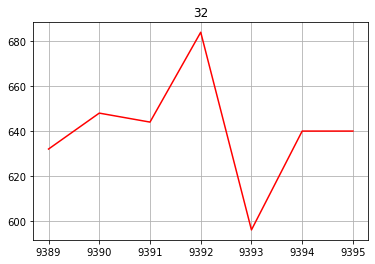

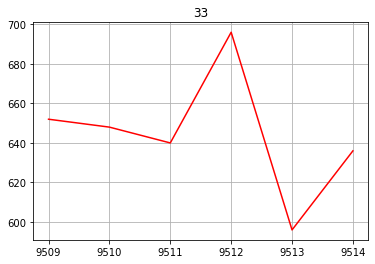

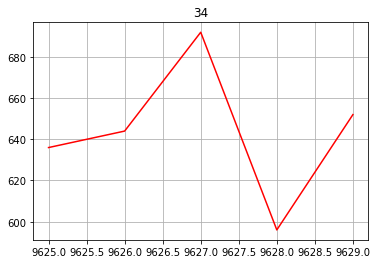

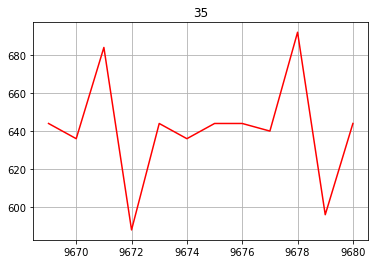

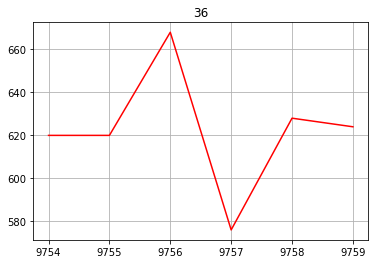

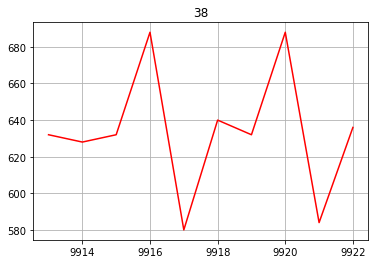

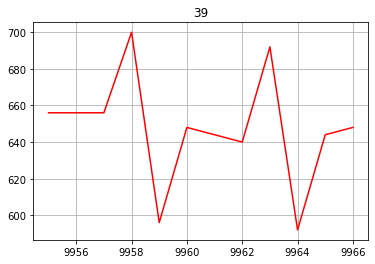

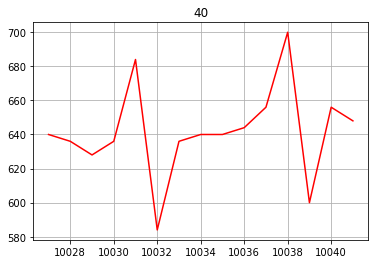

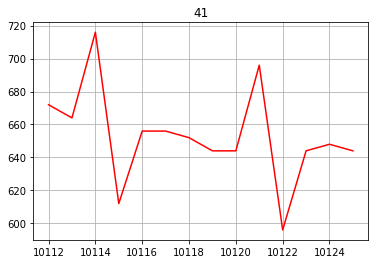

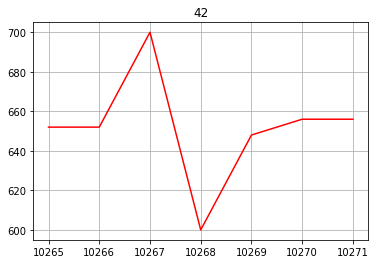

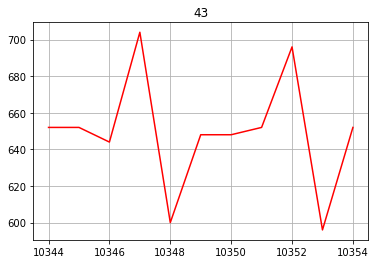

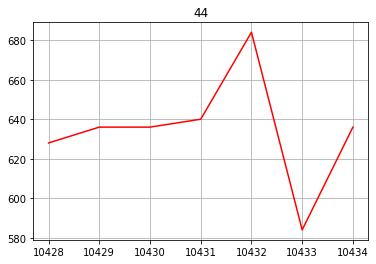

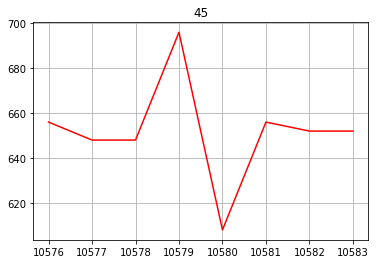

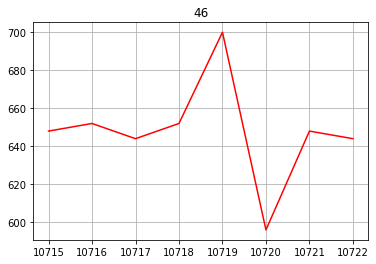

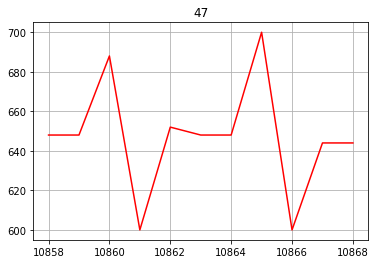

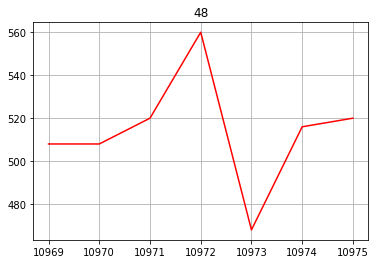

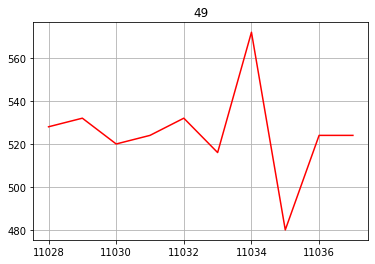

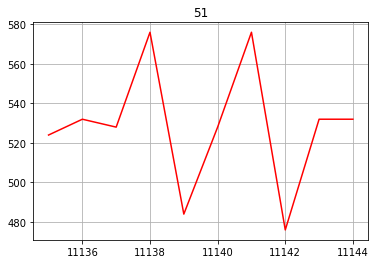

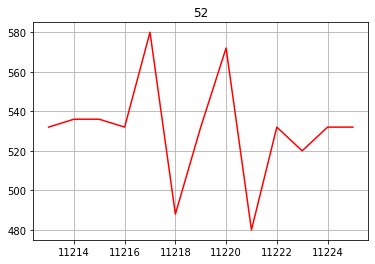

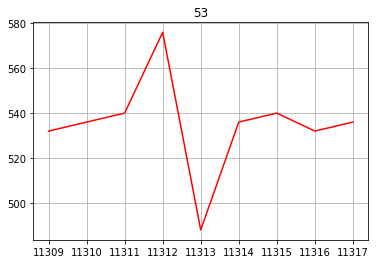

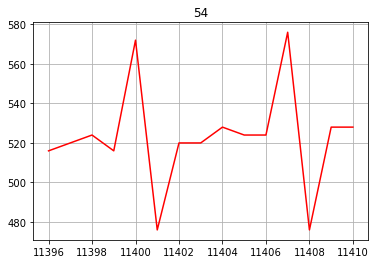

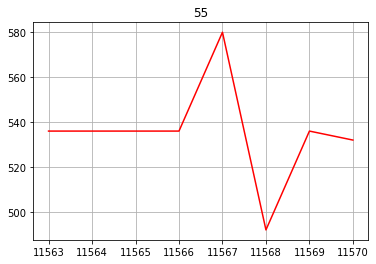

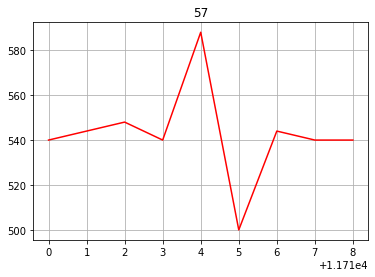

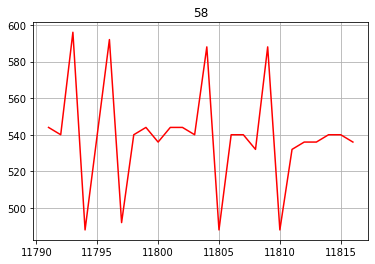

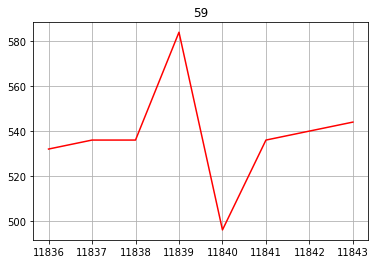

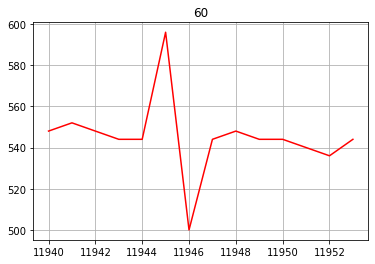

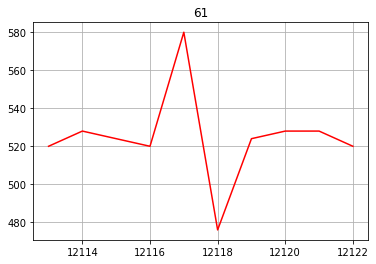

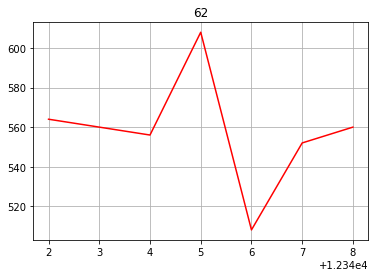

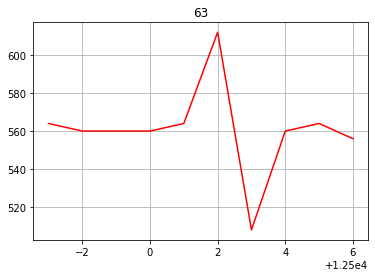

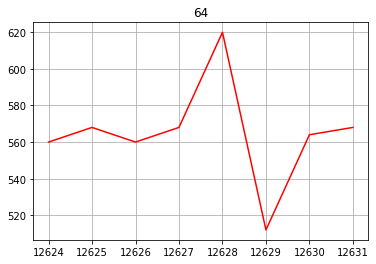

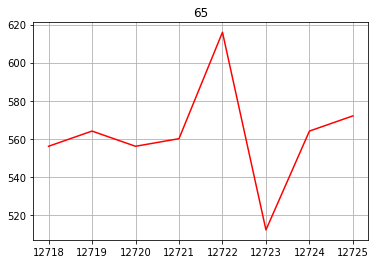

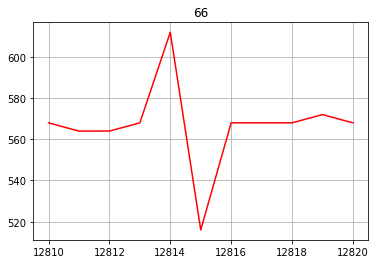

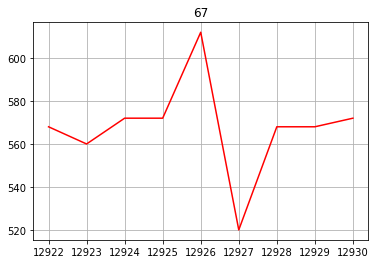

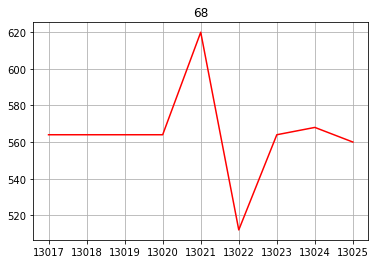

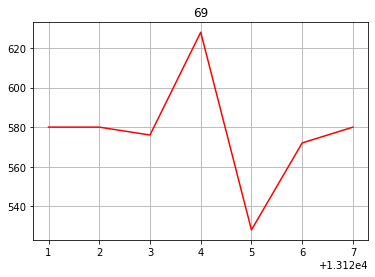

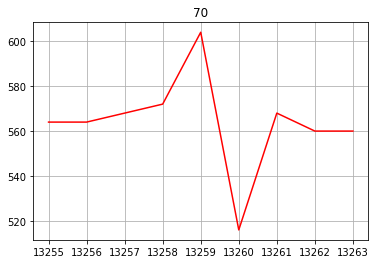

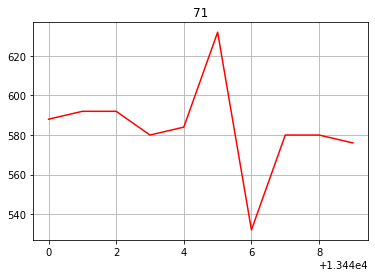

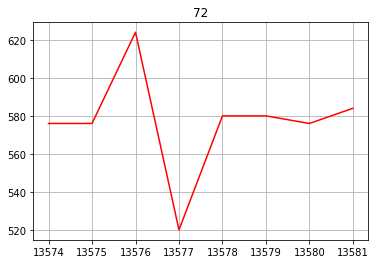

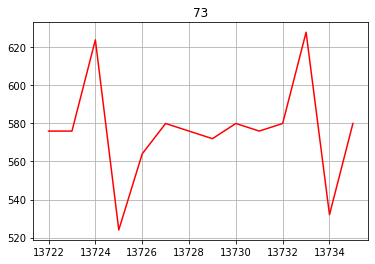

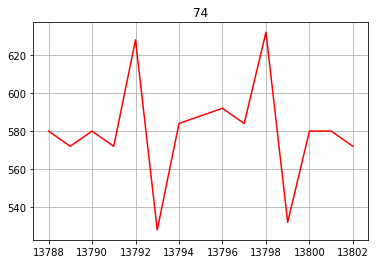

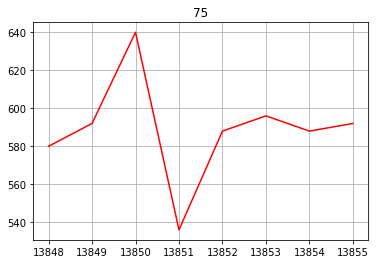

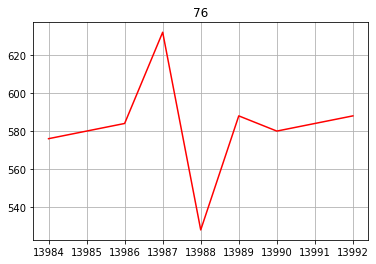

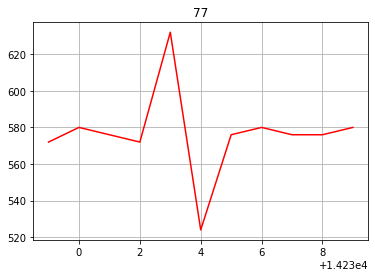

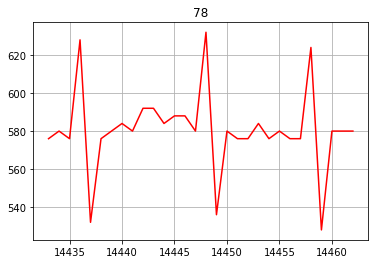

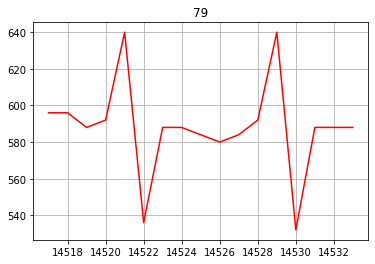

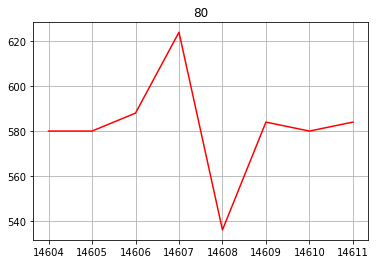

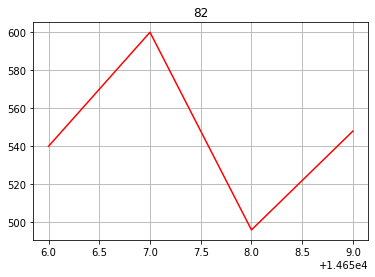

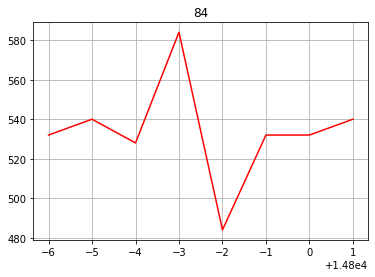

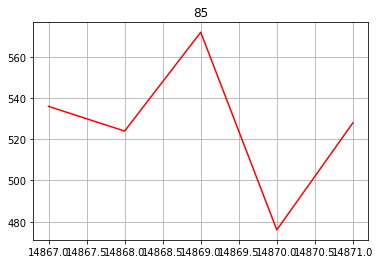

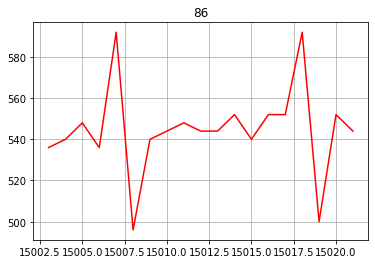

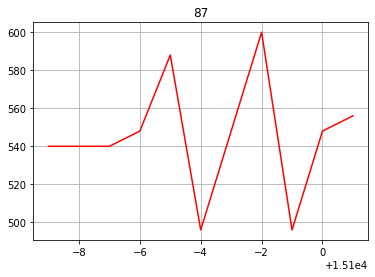

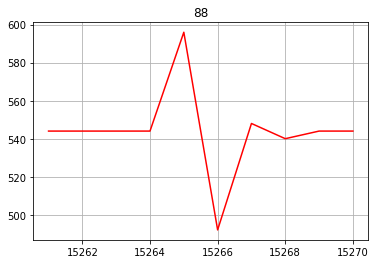

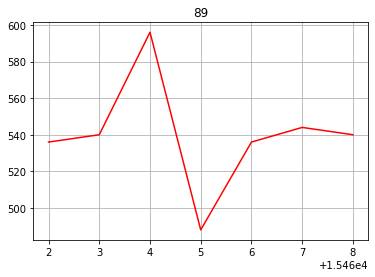

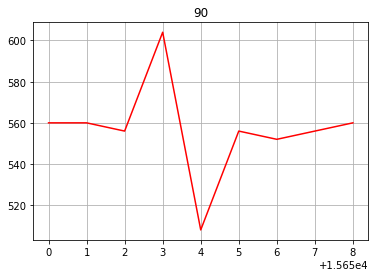

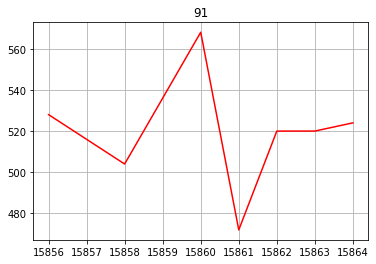

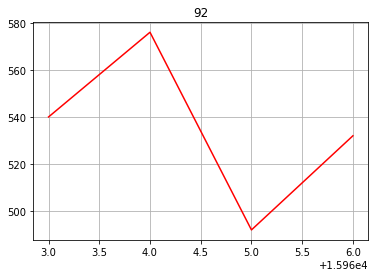

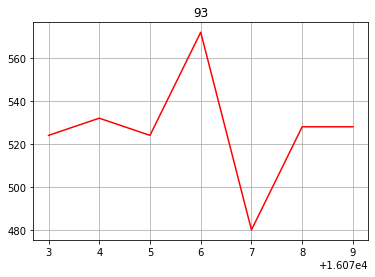

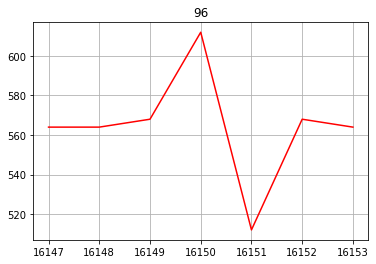

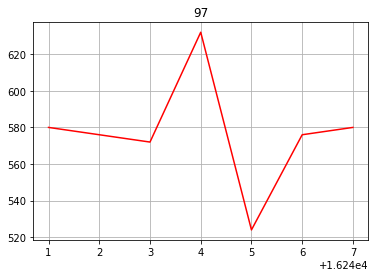

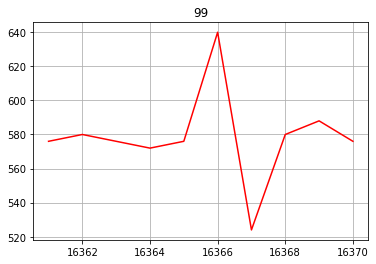

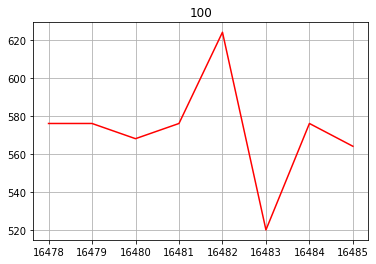

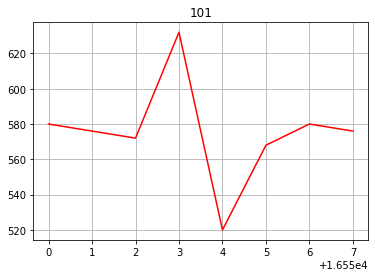

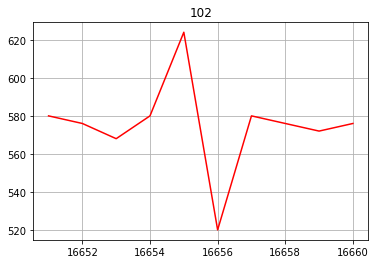

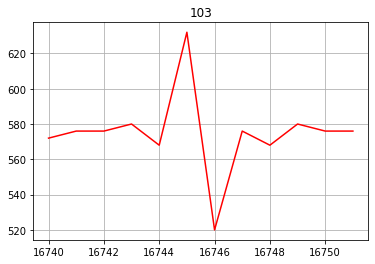

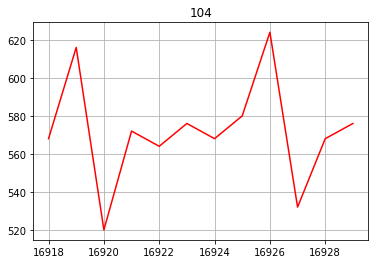

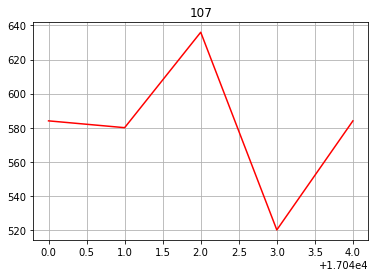

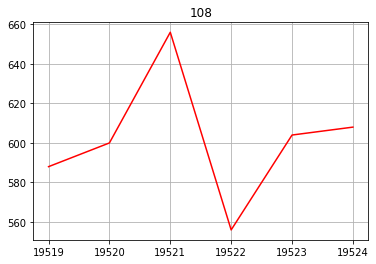

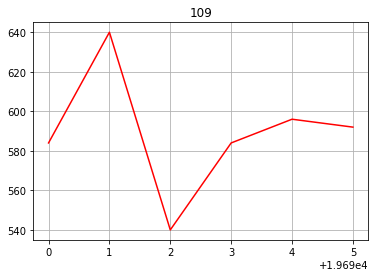

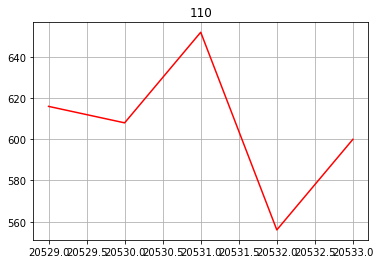

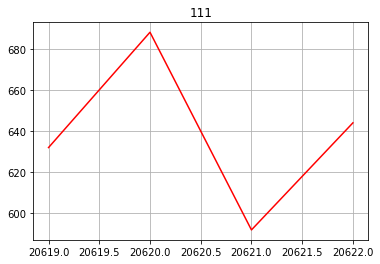

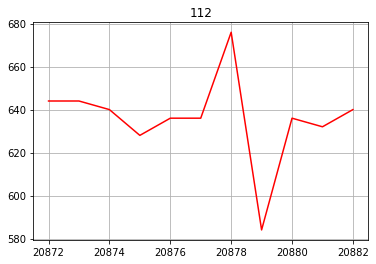

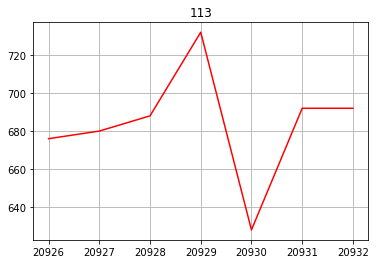

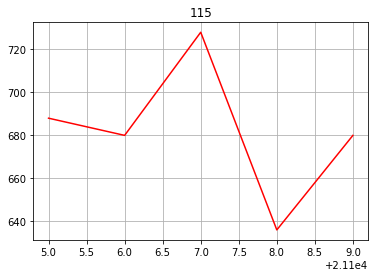

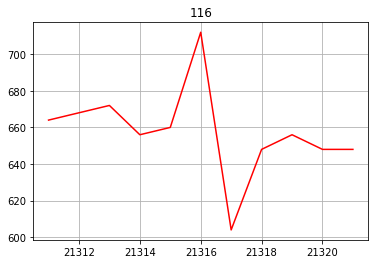

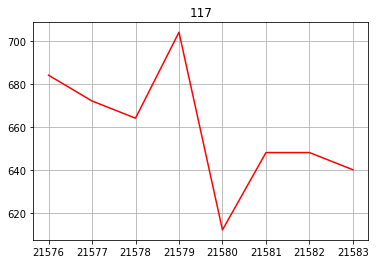

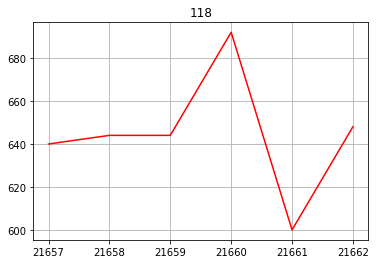

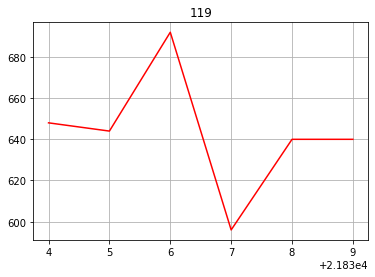

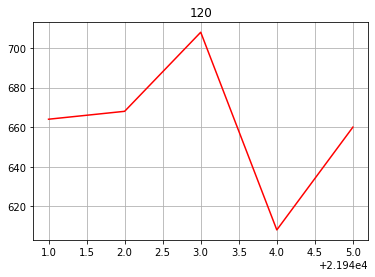

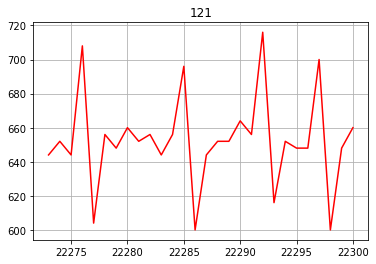

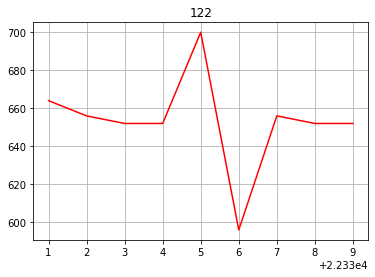

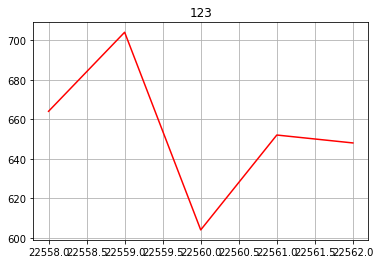

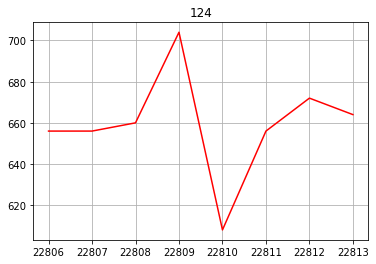

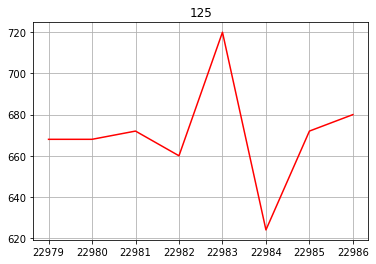

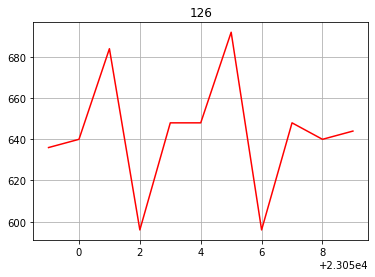

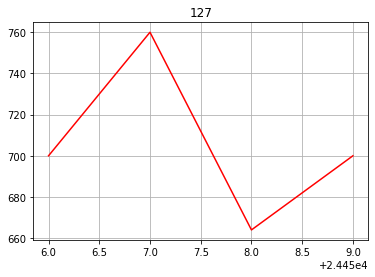

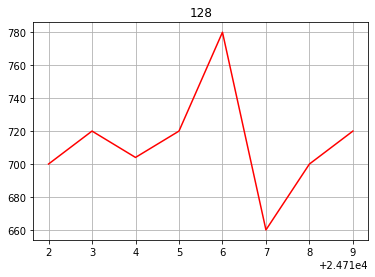

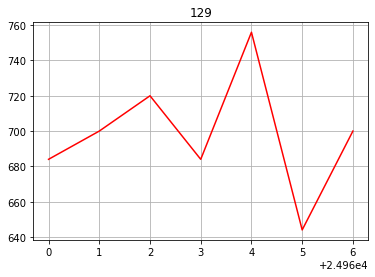

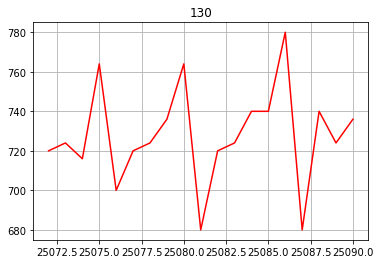

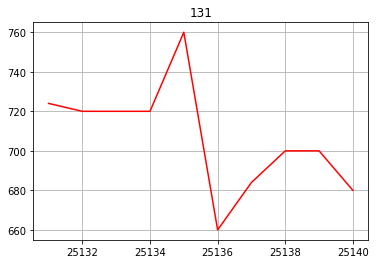

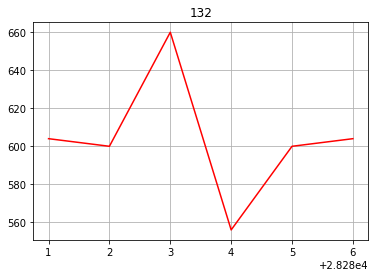

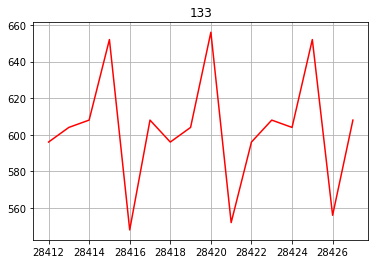

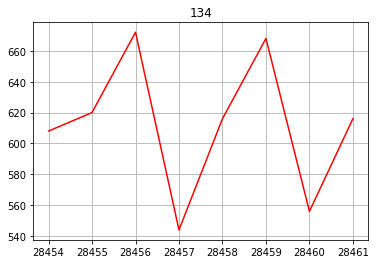

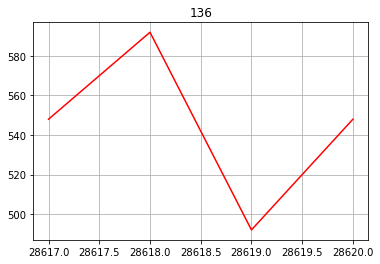

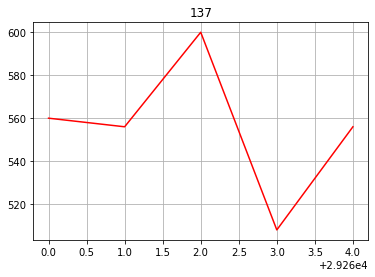

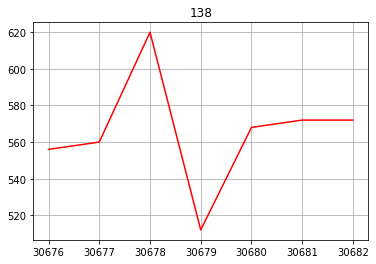

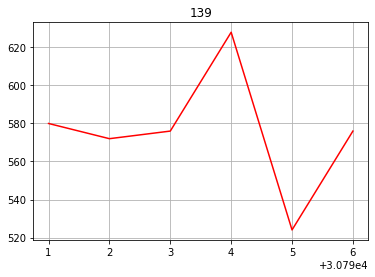

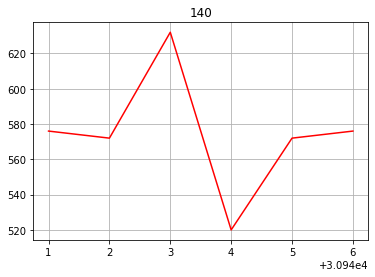

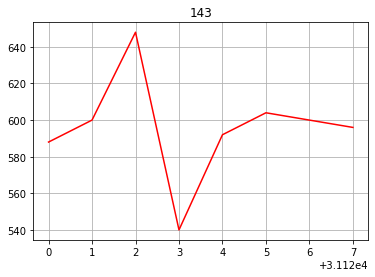

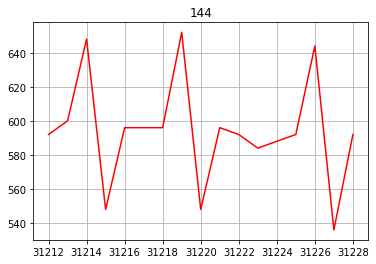

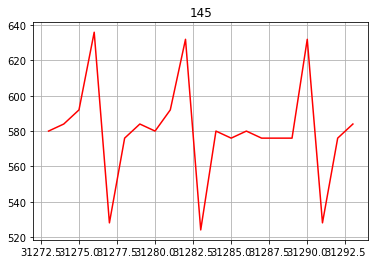

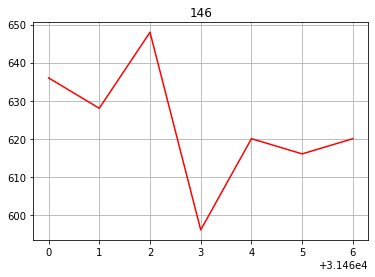

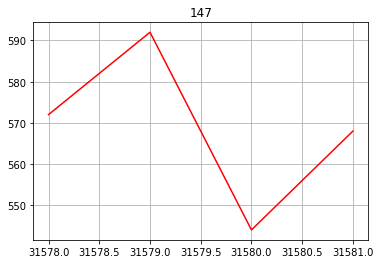

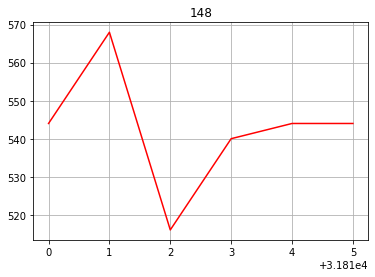

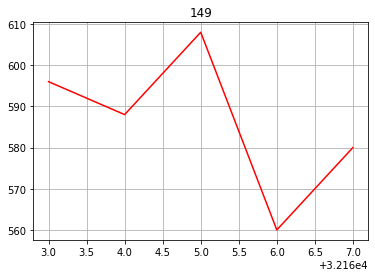

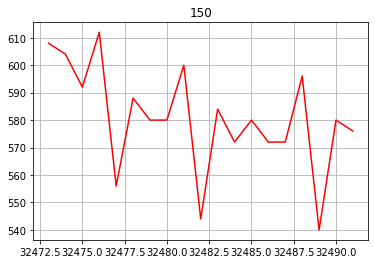

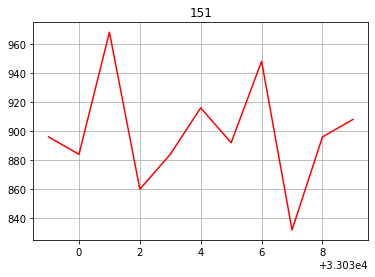

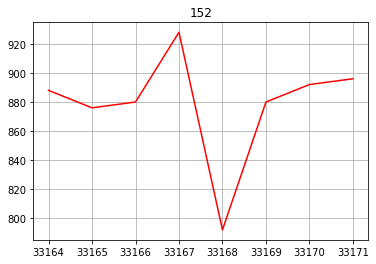

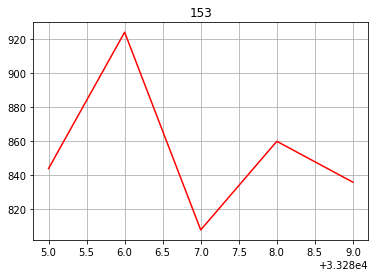

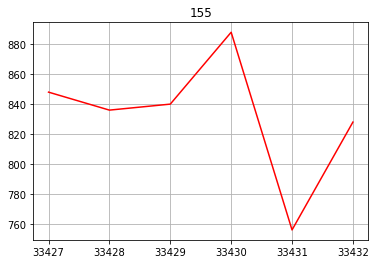

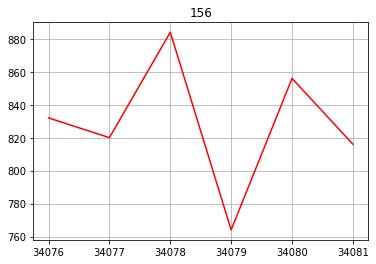

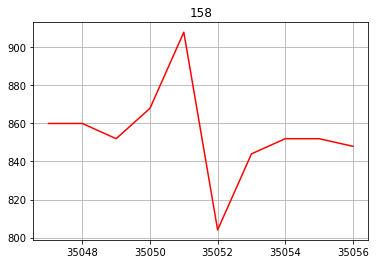

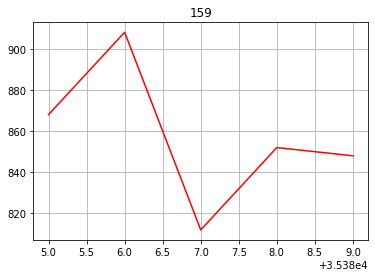

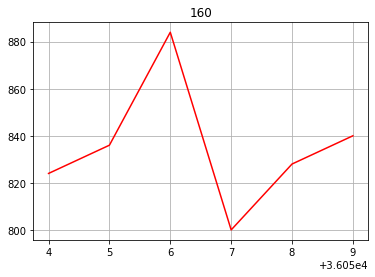

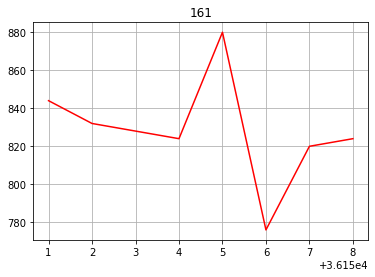

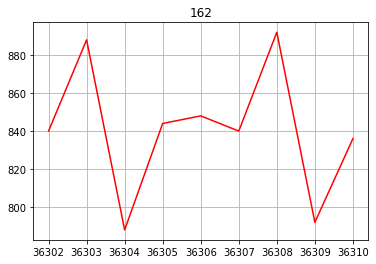

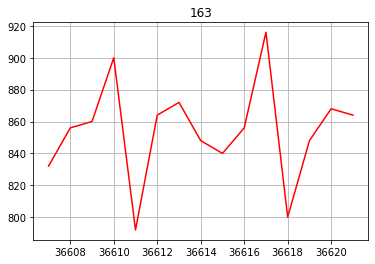

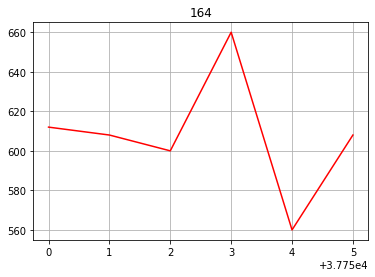

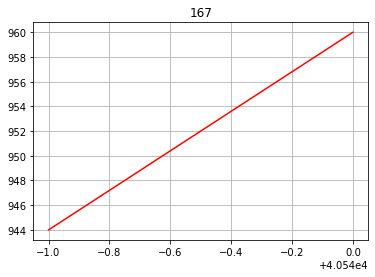

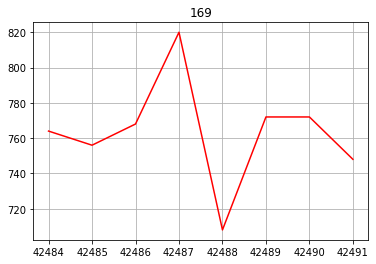

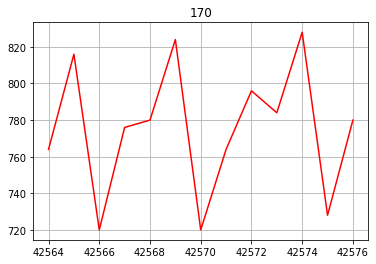

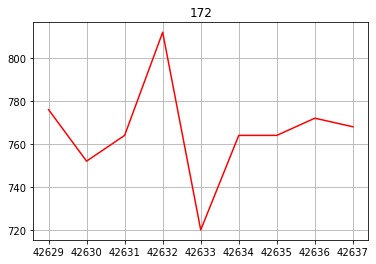

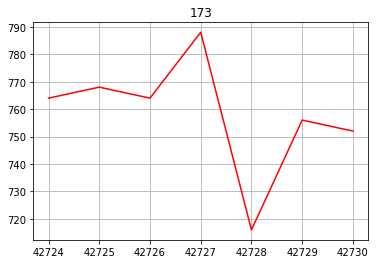

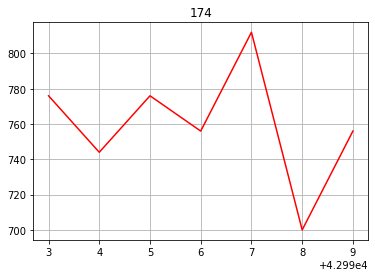

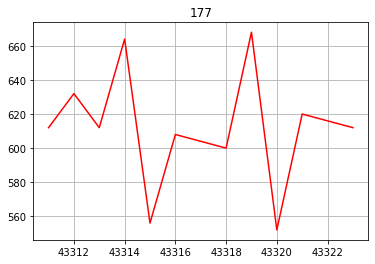

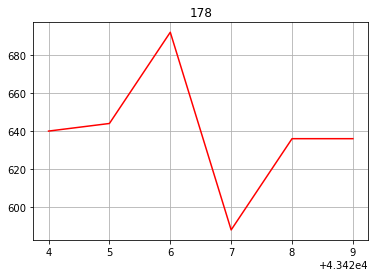

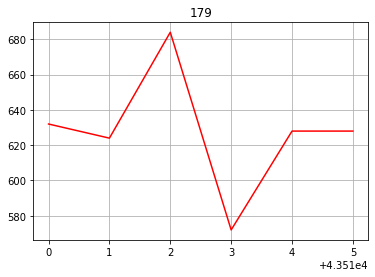

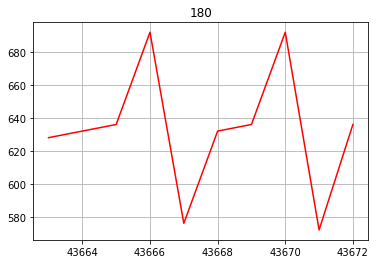

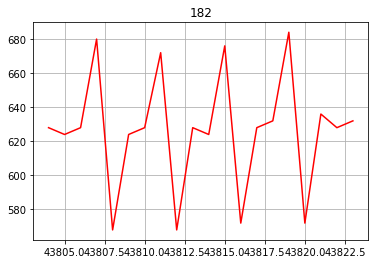

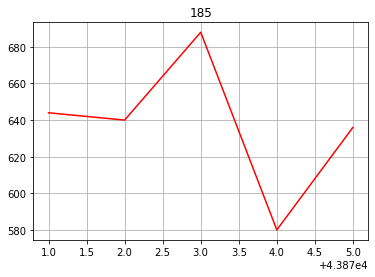

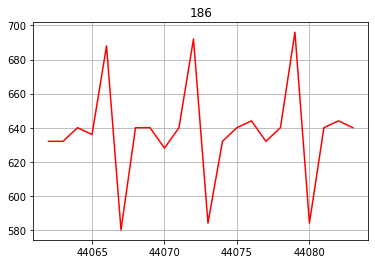

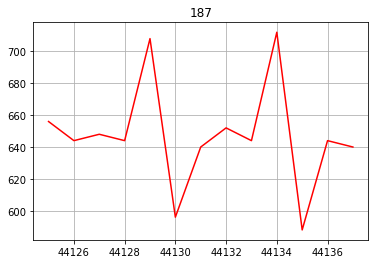

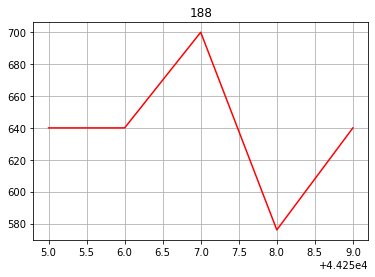

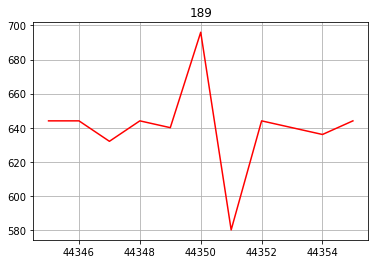

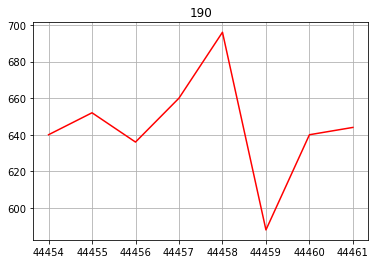

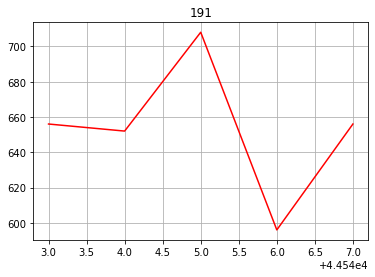

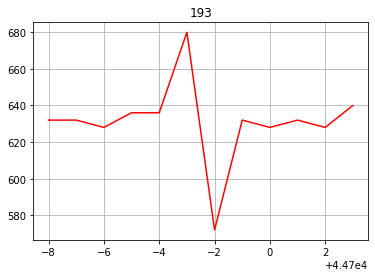

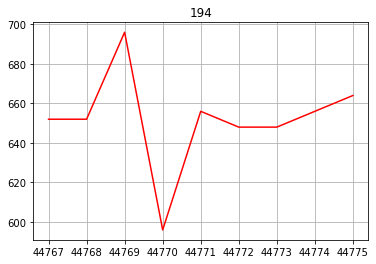

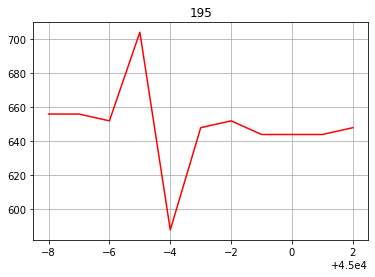

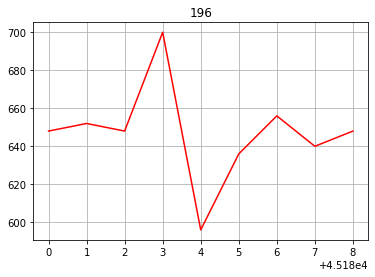

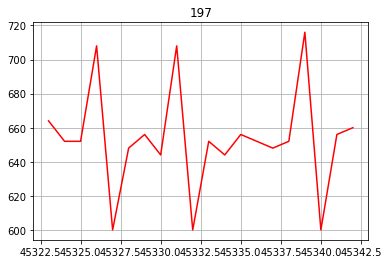

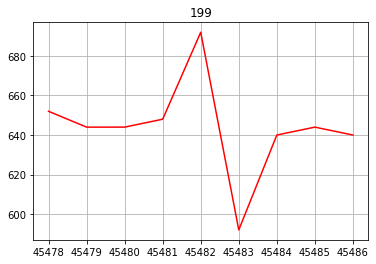

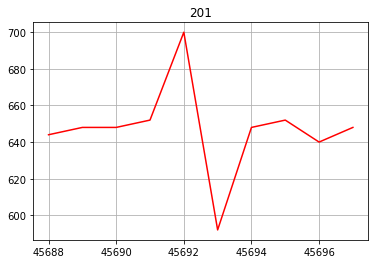

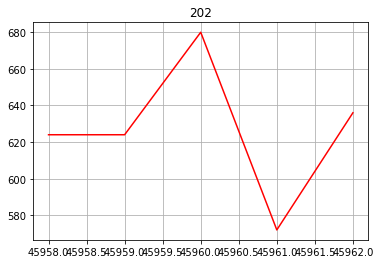

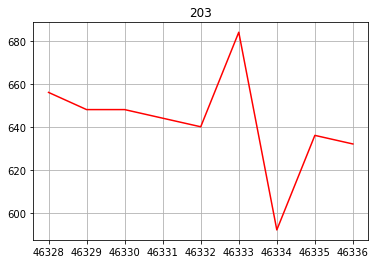

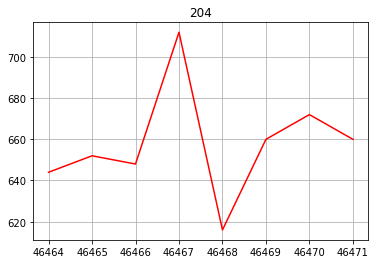

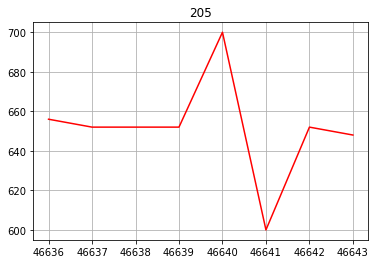

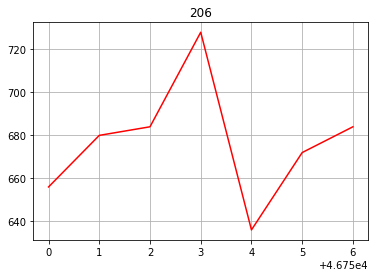

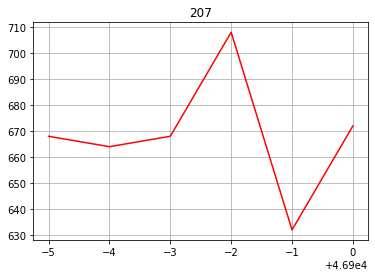

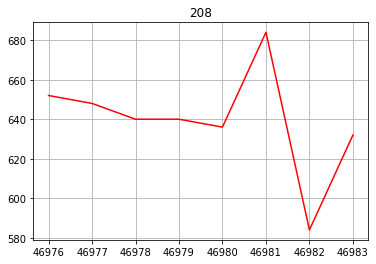

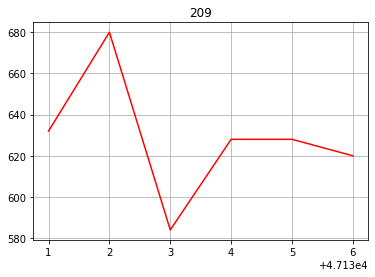

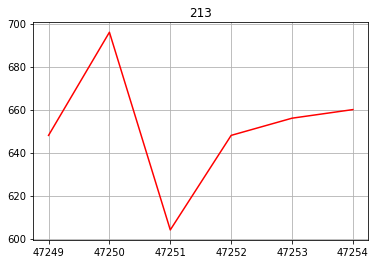

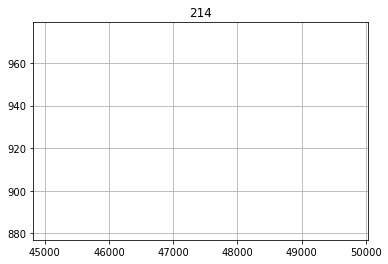

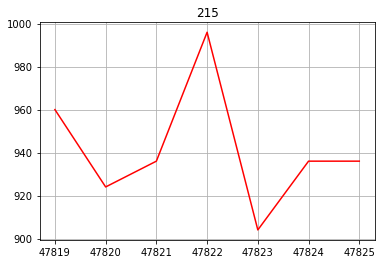

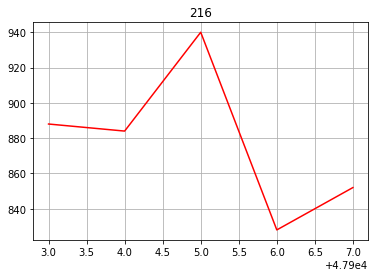

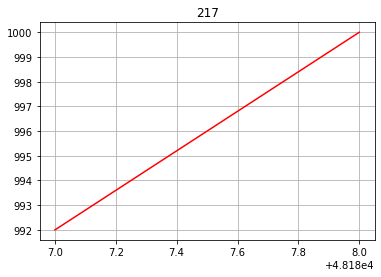

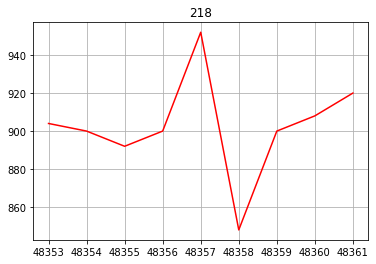

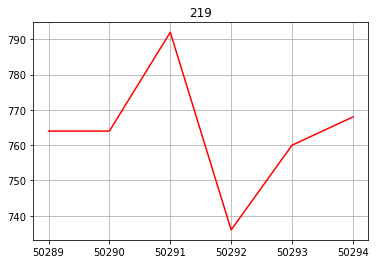

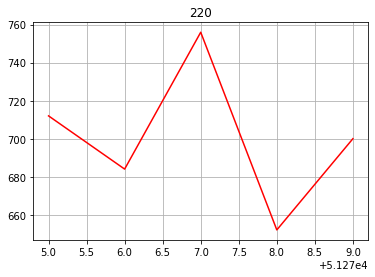

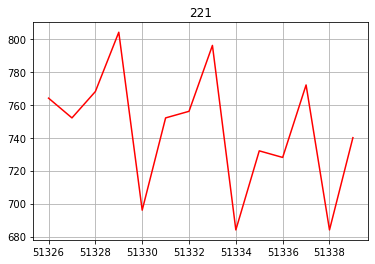

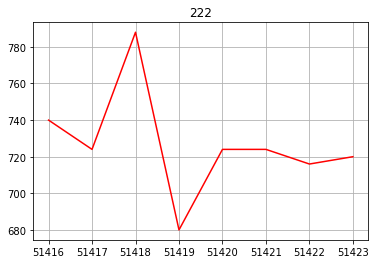

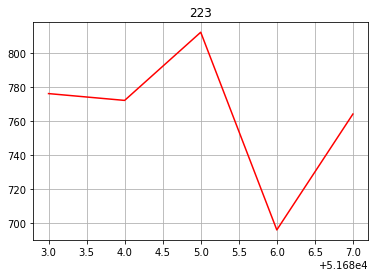

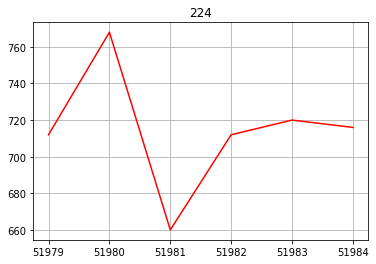

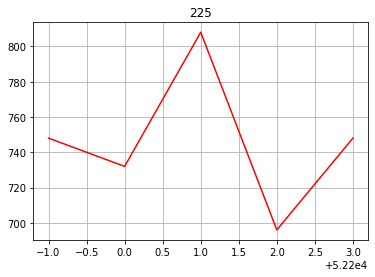

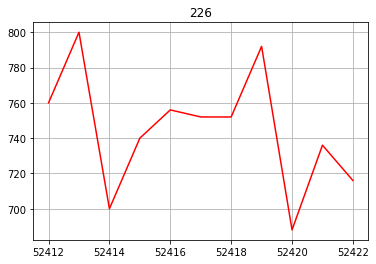

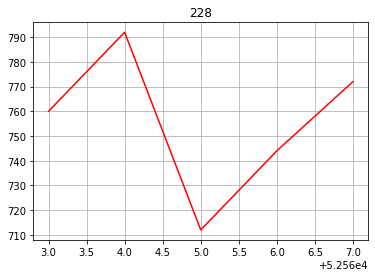

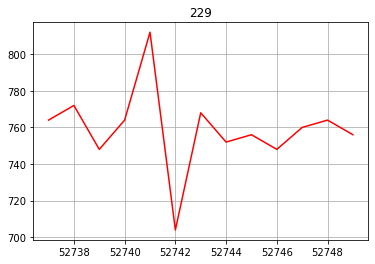

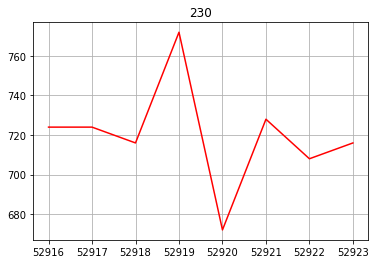

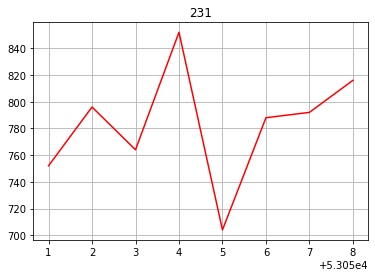

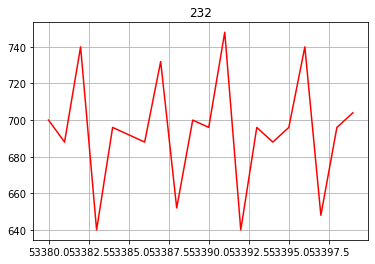

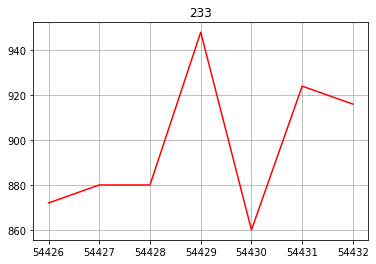

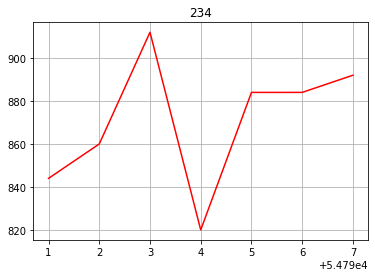

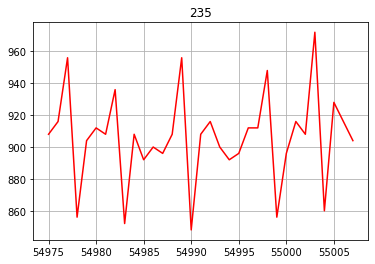

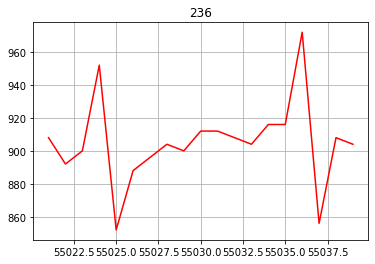

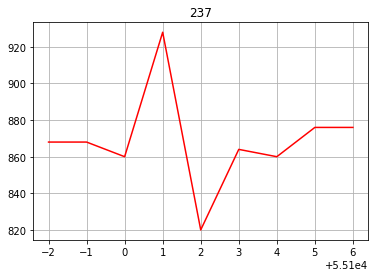

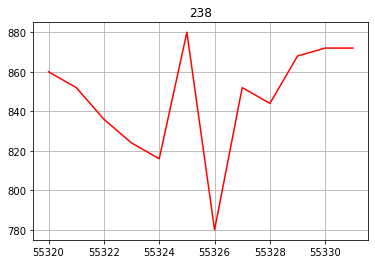

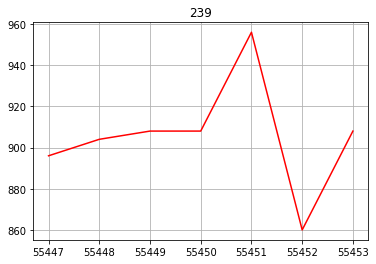

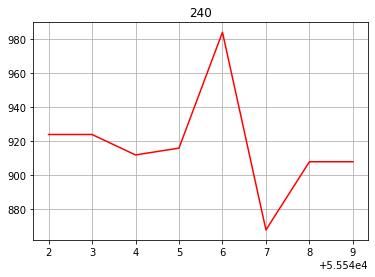

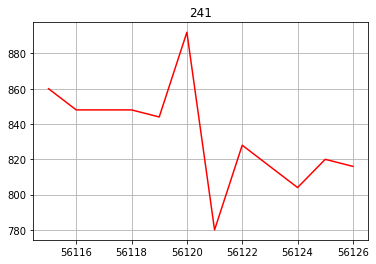

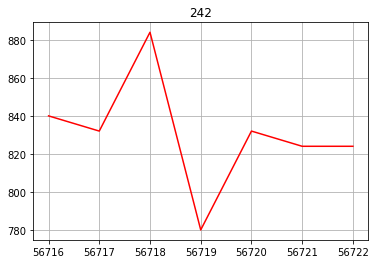

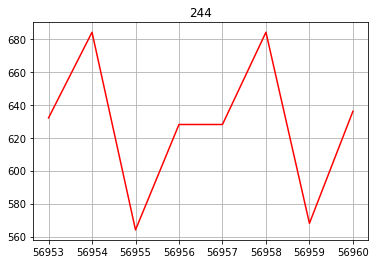

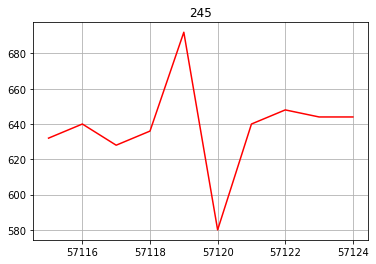

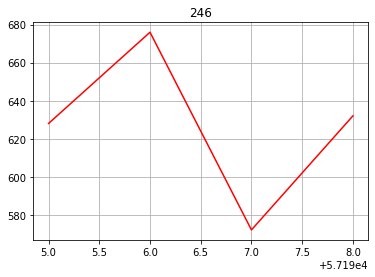

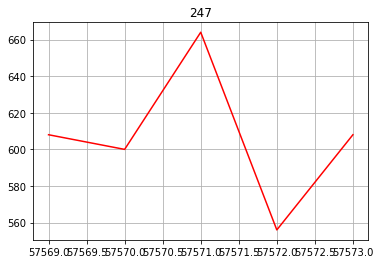

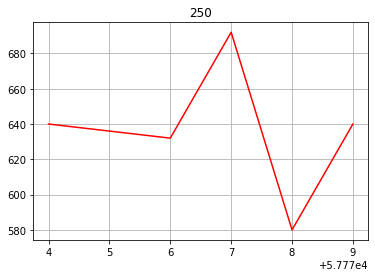

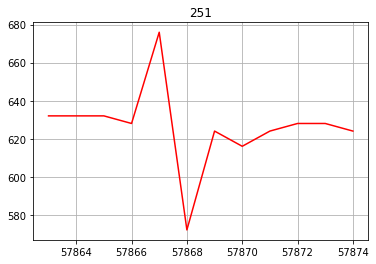

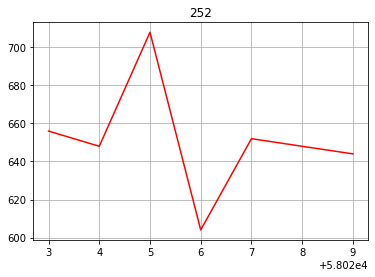

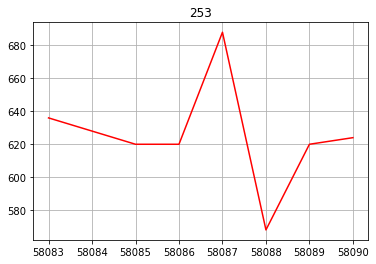

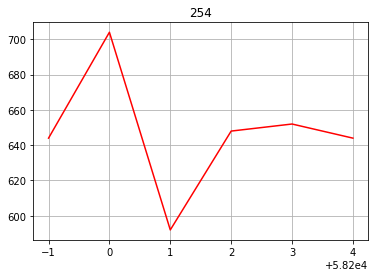

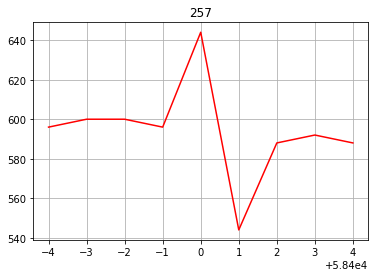

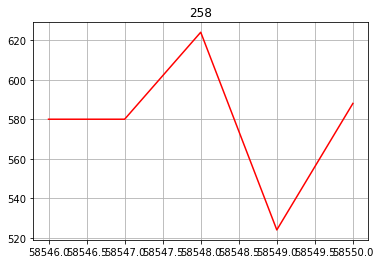

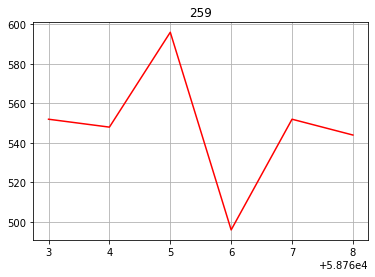

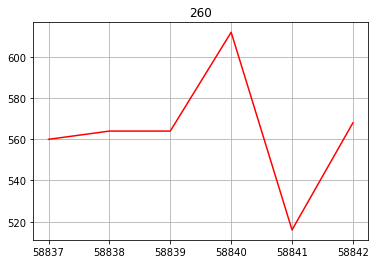

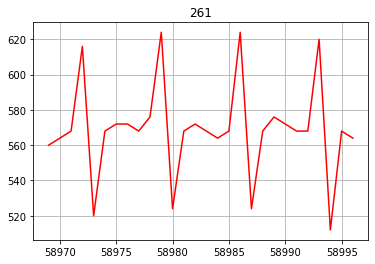

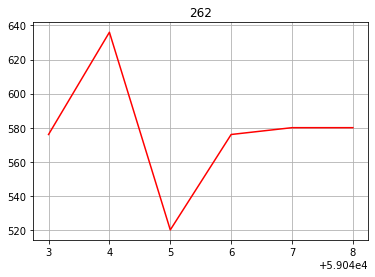

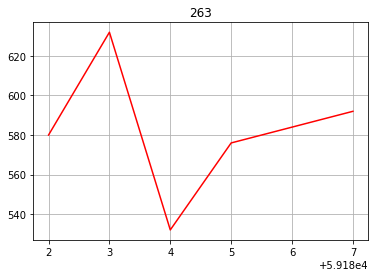

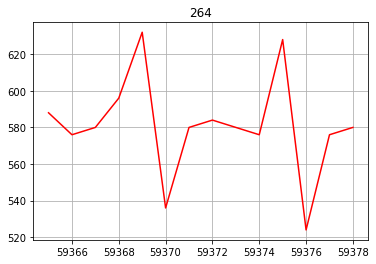

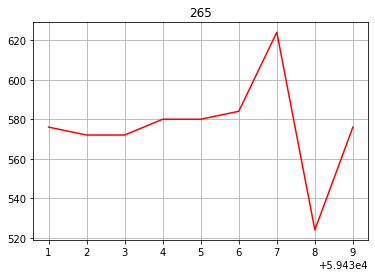

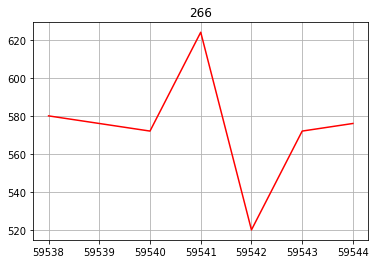

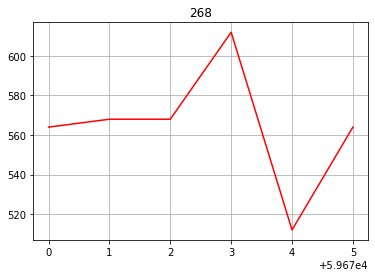

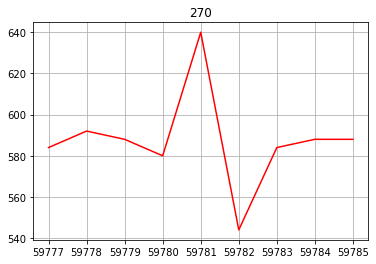

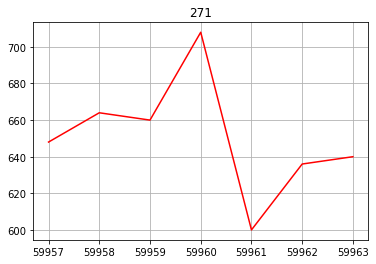

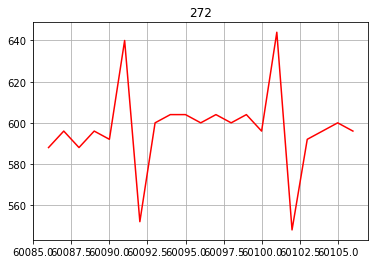

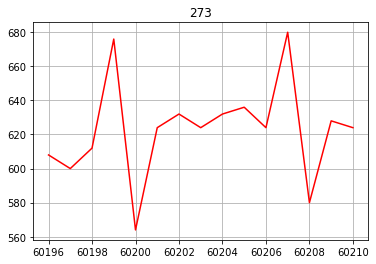

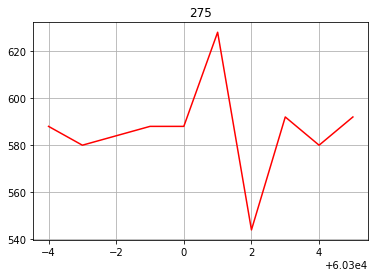

In [6]:
for id_i in pd.unique(data['id']):
    a = data[data['id']==id_i]

    b = a[a['y']==1]

    c = b.iloc[:-1][np.diff(b['time'])>1000]

    c = b.iloc[0:1].append(c)

    c = c.append(b.iloc[-1])

    
#     plt.plot(a['time'], a['x'], 'b')
    
    for j in range(len(c)-1):
        plt.figure()
        d = b[(b['time']>c.iloc[j]['time']) & (b['time']<c.iloc[j+1]['time'])]
#         plt.plot(d['time'], d['x'], 'r')
        plt.plot(d['x'], 'r')    
        plt.title(str(id_i))
        plt.grid()
        break
#     break

In [10]:
data_all = []
for id_i in pd.unique(data['id']):
    a = data[data['id']==id_i]
    a = a.sort_values(by=['time'])
    a.reset_index(inplace=True)
    for i in range(15, len(a) - 15):
        x=a.iloc[i-15:i+15]['x']
        x = (x - x.mean())/x.std()
        y = a.iloc[i]['y']
        X = pd.DataFrame(list(x)).T
        X['y'] = y
        X['id'] = id_i
        if len(data_all)==0:
            data_all = X
        else:
            data_all = data_all.append(X)
#         break
#     break

In [11]:
data_all

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,y,id
0,0.157587,0.001044,0.094969,0.314129,0.188895,0.376747,1.065536,1.409930,1.378621,1.159461,...,0.032352,-0.092882,-0.343351,-0.312042,-0.186808,-2.660186,-3.630752,-0.249425,0,1
0,0.009396,0.103351,0.322580,0.197306,0.385217,1.074223,1.418727,1.387408,1.168179,0.447854,...,-0.084560,-0.335108,-0.303789,-0.178515,-2.652674,-3.623547,-0.241152,-0.084560,0,1
0,0.111595,0.330613,0.205460,0.393189,1.081532,1.425703,1.394415,1.175397,0.455766,0.111595,...,-0.326441,-0.295153,-0.170000,-2.641774,-3.611711,-0.232576,-0.076135,-0.232576,0,1
0,0.343762,0.218757,0.406264,1.093787,1.437548,1.406297,1.187540,0.468766,0.125004,0.000000,...,-0.281259,-0.156255,-2.625088,-3.593871,-0.218757,-0.062502,-0.218757,-0.281259,0,1
0,0.235840,0.423677,1.112414,1.456782,1.425476,1.206332,0.486290,0.141921,0.016697,-0.296365,...,-0.139834,-2.613025,-3.583517,-0.202447,-0.045916,-0.202447,-0.265059,-0.139834,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,-0.260546,-0.288663,-0.260546,3.619532,-0.260546,-0.260546,-0.316779,-0.260546,-0.260546,-0.316779,...,-0.232430,-0.260546,-0.232430,-0.232430,-0.288663,-0.232430,0.076852,-0.626061,0,275
0,-0.287649,-0.259540,3.619508,-0.259540,-0.259540,-0.315758,-0.259540,-0.259540,-0.315758,-0.287649,...,-0.259540,-0.231431,-0.231431,-0.287649,-0.231431,0.077768,-0.624958,-0.287649,0,275
0,-0.259540,3.619508,-0.259540,-0.259540,-0.315758,-0.259540,-0.259540,-0.315758,-0.287649,-0.287649,...,-0.231431,-0.231431,-0.287649,-0.231431,0.077768,-0.624958,-0.287649,-0.287649,0,275
0,3.619487,-0.258535,-0.258535,-0.314738,-0.258535,-0.258535,-0.314738,-0.286636,-0.286636,-0.230433,...,-0.230433,-0.286636,-0.230433,0.078684,-0.623856,-0.286636,-0.286636,-0.286636,0,275


In [13]:
a = pd.DataFrame(pd.unique(data_all['id'])).sample(frac=1, random_state=1)

In [66]:
len(pd.unique(data['id']))

229

In [74]:
a.columns = ['id']

In [85]:
data_all_train = pd.merge(data_all, a.iloc[:int(229*0.8)], left_on=['id'], right_on=['id'])
data_all_test = pd.merge(data_all, a.iloc[int(229*0.8):], left_on=['id'], right_on=['id'])

In [86]:
Y_train = data_all_train['y']
Y_test = data_all_test['y']

In [87]:
data_all_train.drop('y', axis='columns', inplace=True)
data_all_train.drop('id', axis='columns', inplace=True)

data_all_test.drop('y', axis='columns', inplace=True)
data_all_test.drop('id', axis='columns', inplace=True)

In [127]:
#train model
dtreg = xgb.XGBClassifier(
                        max_depth=25, 
                        n_estimators=10000,
                        learning_rate=0.9, 
#                         colsample_bytree=0.01, 
#                             subsample=1.0,
#                         three_method = 'gpu_hist'
                        nthread=12, 
                        )
dtreg.fit(data_all_train, Y_train, early_stopping_rounds=100, eval_set=[(data_all_test, Y_test)], 
#                  eval_metric=["merror"]
         )
best_iteration = dtreg.get_booster().best_ntree_limit
pred = dtreg.predict(data_all_test, ntree_limit=best_iteration)

[0]	validation_0-error:0.089351
Will train until validation_0-error hasn't improved in 100 rounds.
[1]	validation_0-error:0.088132
[2]	validation_0-error:0.079906
[3]	validation_0-error:0.081505
[4]	validation_0-error:0.078611
[5]	validation_0-error:0.076325
[6]	validation_0-error:0.074954
[7]	validation_0-error:0.074726
[8]	validation_0-error:0.073583
[9]	validation_0-error:0.073812
[10]	validation_0-error:0.073812
[11]	validation_0-error:0.073659
[12]	validation_0-error:0.072745
[13]	validation_0-error:0.071298
[14]	validation_0-error:0.071298
[15]	validation_0-error:0.071298
[16]	validation_0-error:0.069927
[17]	validation_0-error:0.070003
[18]	validation_0-error:0.069394
[19]	validation_0-error:0.070155
[20]	validation_0-error:0.070079
[21]	validation_0-error:0.069927
[22]	validation_0-error:0.069241
[23]	validation_0-error:0.069775
[24]	validation_0-error:0.070155
[25]	validation_0-error:0.070155
[26]	validation_0-error:0.069927
[27]	validation_0-error:0.069851
[28]	validation_0-e

<AxesSubplot:>

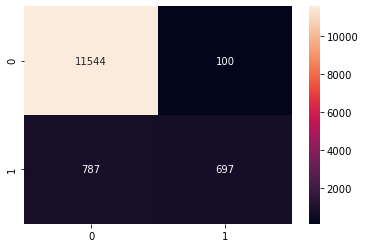

In [128]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
labels = np.unique(Y_test)
a = confusion_matrix(Y_test, pred, labels=labels)
sns.heatmap(pd.DataFrame(a, index=labels, columns=labels), annot=True, fmt="d")